In [ ]:
cd data

/content/data


In [ ]:
# pandasをインポート
import pandas as pd

# auto_mgp.csvファイルを読み込んで、データフレームに変換
df = pd.read_csv('auto_mgp.csv')
# 先頭５行の表示
df.head()

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
# 欠損値の確認
df.isnull().any(axis=0)

Unnamed: 0      False
MPG             False
Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
Origin          False
dtype: bool

In [ ]:
# 欠損値がいくつあるか集計
df['Horsepower'].isnull().sum()

6

In [ ]:
# 欠損値を平均で補完
df2 = df.fillna(df.mean())

# 穴埋めができたか確認
df2['Horsepower'].isnull().any(axis=0)

False

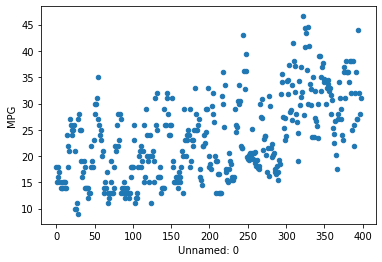

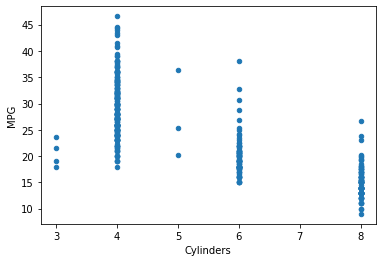

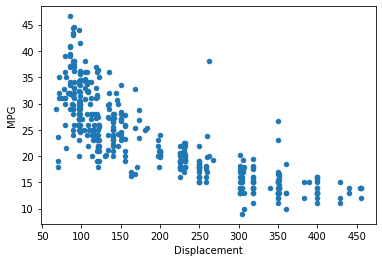

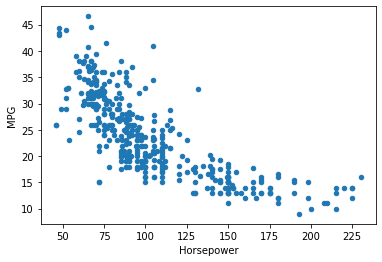

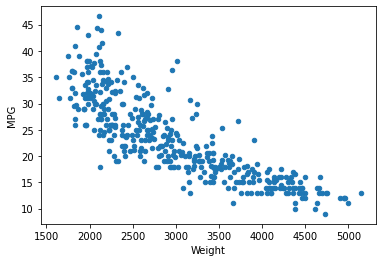

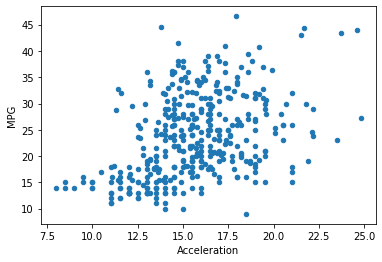

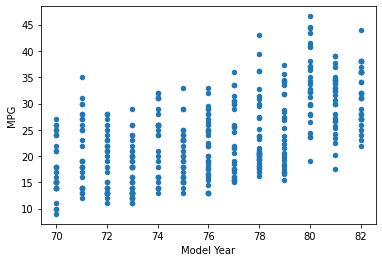

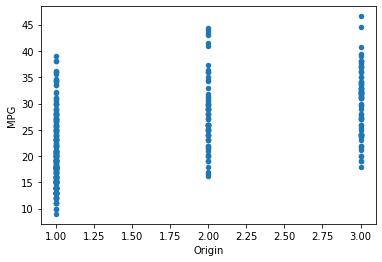

In [ ]:
# 散布図で外れ値の確認
%matplotlib inline

# 特徴量の列と家賃列の相関関係を示す散布図を描く
colname = df2.columns
for name in colname:
  # MPG(燃費)列を除く
  if name !=  'MPG':
      df2.plot(kind = 'scatter', x = name, y = 'MPG')


In [ ]:
# 散布図だとあからさまな外れ値が見つからない
# スライス構文で特徴量と正解データを取り出す
x = df2.loc[:,'Cylinders':]

t = df2['MPG']

print(x.shape)
print(t.shape)

(398, 7)
(398,)


In [ ]:
# 訓練データとテストデータに分割　テストデータを２割
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,t,test_size=0.2,random_state = 0)
print(x_train.shape)
print(x_test.shape)

(318, 7)
(80, 7)


In [ ]:
# 重回帰モデルを作成
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 訓練データで学習
model.fit(x_train,y_train)

# 正解率を確認　81.88%
model.score(x_test,y_test)

0.8188396884147471

In [ ]:
# リッジ回帰を試す 正解率81.97% 重回帰モデルとあまり変わらず
from sklearn.linear_model import Ridge
ridgeModel = Ridge(alpha = 10)
ridgeModel.fit(x_train,y_train)
ridgeModel.score(x_test,y_test)

0.8197870231083595

In [ ]:
# ラッソ回帰を試す　正解率82.1%
from sklearn.linear_model import Lasso

lassoModel = Lasso(alpha=0.1)
lassoModel.fit(x_train,y_train)
lassoModel.score(x_test,y_test)

0.8210121971894562

In [ ]:
# 回帰木を試す 深さ８が87.59%で正解率が一番良い
from sklearn.tree import DecisionTreeRegressor

for i in range(3,21):
  treeModel = DecisionTreeRegressor(max_depth=i,random_state=0)
  treeModel.fit(x_train,y_train)
  print("深さ",i,"の正解率",treeModel.score(x_test,y_test))

深さ 3 の正解率 0.7974029032290296
深さ 4 の正解率 0.8404125884867986
深さ 5 の正解率 0.8579321238549911
深さ 6 の正解率 0.8719250750296256
深さ 7 の正解率 0.8698807009756317
深さ 8 の正解率 0.8759663144795707
深さ 9 の正解率 0.8616594491966614
深さ 10 の正解率 0.869481539688878
深さ 11 の正解率 0.8662276799540198
深さ 12 の正解率 0.8698905170596798
深さ 13 の正解率 0.8630596522468823
深さ 14 の正解率 0.8630596522468823
深さ 15 の正解率 0.8630596522468823
深さ 16 の正解率 0.8630596522468823
深さ 17 の正解率 0.8630596522468823
深さ 18 の正解率 0.8630596522468823
深さ 19 の正解率 0.8630596522468823
深さ 20 の正解率 0.8630596522468823


In [ ]:
# 特徴量の重要度を確認 シリンダーの数が一番重要、次いで馬力、重量、発表年
# 散布図だとシリンダーは相関関係がないが…
pd.Series(treeModel.feature_importances_, index = x.columns)

Cylinders       0.567107
Displacement    0.030473
Horsepower      0.130573
Weight          0.119109
Acceleration    0.033352
Model Year      0.111091
Origin          0.008295
dtype: float64

In [ ]:
# 欠損データの本来の値を予測してみる
# Horsepower列に6つの欠損値がある
horse_df = pd.read_csv('auto_mgp.csv')
# 欠損値を含む行を削除
non_df = horse_df.dropna()

x1 = non_df[['MPG','Cylinders','Displacement','Weight','Acceleration','Model Year','Origin']]
t1 = non_df['Horsepower']
model2 = LinearRegression() 
model2.fit(x,t)

LinearRegression()

In [ ]:
# 欠損行の抜き出しと表示
condition = horse_df['Horsepower'].isnull()
non_data = horse_df.loc[condition]
non_data

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,32,25.0,4,98.0,NaN,2046,19.0,71,1
126,126,21.0,6,200.0,NaN,2875,17.0,74,1
330,330,40.9,4,85.0,NaN,1835,17.3,80,2
336,336,23.6,4,140.0,NaN,2905,14.3,80,1
354,354,34.5,4,100.0,NaN,2320,15.8,81,2
374,374,23.0,4,151.0,NaN,3035,20.5,82,1


In [ ]:
# 欠損行の入力に利用する特徴量を抜き出す
x3 = non_data[['MPG','Cylinders','Displacement','Weight','Acceleration','Model Year','Origin']]
pred = model2.predict(x3)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MPG
Feature names seen at fit time, yet now missing:
- Horsepower

  warnings.warn(message, FutureWarning)


array([13.79530086, 10.84006027, 16.76454808, 14.45982945, 16.61487597,
       15.86187914])

In [ ]:
# 欠損行のHoresepowerを抜き出してpredで代入
horse_df.loc[condition,'Horsepower'] = pred
# 穴埋めできたか確認
horse_df['Horsepower'].isnull().any(axis=0)

False

In [ ]:
# 改めて各手法で正解率を確認する
# スライス構文で特徴量と正解データを取り出す
x = horse_df.loc[:,'Cylinders':]

t = horse_df['MPG']

In [ ]:
# 訓練データとテストデータに分割　テストデータを２割
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,t,test_size=0.2,random_state = 0)

# 重回帰モデル
model = LinearRegression()

# 訓練データで学習
model.fit(x_train,y_train)

# 正解率を確認　81.88%→82.3%
model.score(x_test,y_test)

0.8230022185279607

In [ ]:
# リッジ回帰を試す 正解率81.97%→82.37%
from sklearn.linear_model import Ridge
ridgeModel = Ridge(alpha = 10)
ridgeModel.fit(x_train,y_train)
ridgeModel.score(x_test,y_test)

0.823715454937912

In [ ]:
# ラッソ回帰を試す　正解率82.1%→82.48%
from sklearn.linear_model import Lasso

lassoModel = Lasso(alpha=0.1)
lassoModel.fit(x_train,y_train)
lassoModel.score(x_test,y_test)

0.8248760708380835

In [ ]:
# 回帰木を試す 深さ7が89.98%で正解率が一番良い
from sklearn.tree import DecisionTreeRegressor

for i in range(3,8):
  treeModel = DecisionTreeRegressor(max_depth=i,random_state=0)
  treeModel.fit(x_train,y_train)
  print("深さ",i,"の正解率",treeModel.score(x_test,y_test))

深さ 3 の正解率 0.8220977477991225
深さ 4 の正解率 0.8552204071242837
深さ 5 の正解率 0.8840453221351532
深さ 6 の正解率 0.8878986617237519
深さ 7 の正解率 0.8998728617646259


In [ ]:
# 回帰木で作成したモデルを保存する
import pickle
with open('auto_mgp.pkl','wb')as f :
  pickle.dump(treeModel,f)

In [ ]:
# データ分析の大切さ、難しさ、奥深さを学ばさせていただけました。ありがとうございました。